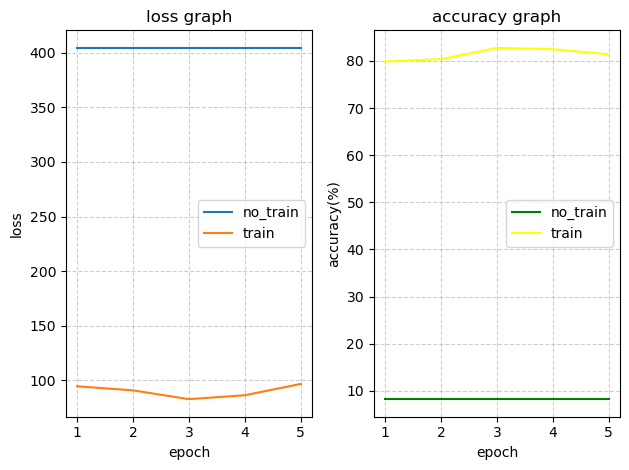

In [35]:
import matplotlib.pyplot as plt

# Figure와 Axes 객체를 명시적으로 생성
# figure는 그래프가 그려지는 영역 전체 의미
# ax 는 선, 점이 그려지는 x,y축 내부를 의미
# nrows * ncols만큼의 서브그래프 생성
# axes[0, 1]처럼 인덱싱을 통해 서브그래프에 접근 가능
fig, axes = plt.subplots(nrows=1, ncols=2)

# Axes 객체의 메서드를 사용하여 그림
    # 하나의 ax에 여러개의 plot를 배치하여 여러개의 그래프를 그릴 수 있음

no_train = [(404.4731876850128, 8.24), (404.4731876850128, 8.24), (404.4731876850128, 8.24), (404.4731876850128, 8.24), (404.4731876850128, 8.24)]
train = [(94.51405730843544, 79.88), (90.77341003715992, 80.4), (82.71617163717747, 82.78), (86.31026682257652, 82.5), (96.64728400111198, 81.43)]
# 손실그래프 생성
axes[0].plot([i for i in range (1, 6)], list(map(lambda t:t[0], no_train)), label='no_train') # 훈련 전
axes[0].plot([i for i in range (1, 6)], list(map(lambda t:t[0], train)), label='train') # 훈련 후

axes[0].set_title("loss graph")
axes[0].set_xlabel("epoch")
axes[0].set_ylabel("loss")
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()


# 정확도 그래프 생성
axes[1].plot([i for i in range (1, 6)], list(map(lambda t:t[1], no_train)), label='no_train', color='green') # 훈련 전
axes[1].plot([i for i in range (1, 6)], list(map(lambda t:t[1], train)), label='train', color='yellow') # 훈련 후

axes[1].set_title("accuracy graph")
axes[1].set_xlabel("epoch")
axes[1].set_ylabel("accuracy(%)")
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

fig.tight_layout() # 서브플롯들이 겹치지 않도록 간격조절
plt.show()

In [22]:
print([(1,2)]*5)

[(1, 2), (1, 2), (1, 2), (1, 2), (1, 2)]


X shape: (200, 2)
y shape: (200,)


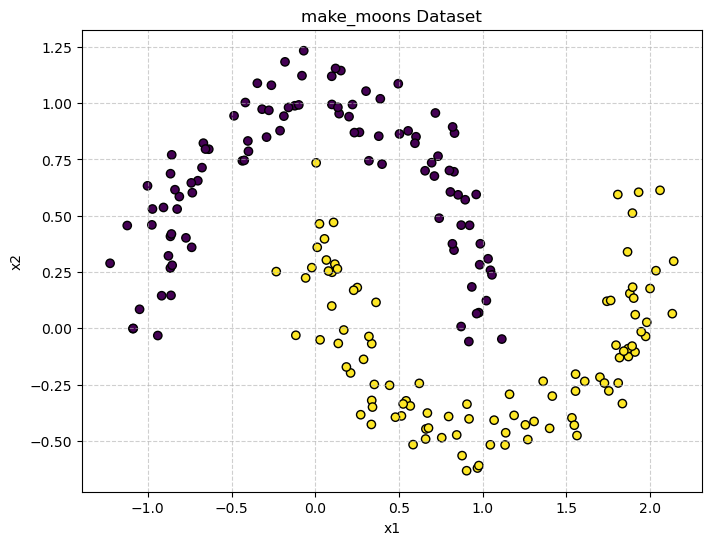

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# 1. make_moons 데이터셋 생성
# n_samples: 총 데이터 포인트 개수
# noise: 노이즈(흩어짐) 정도 (0은 완벽한 선)
# random_state: 재현을 위한 시드값 (실행할 때마다 동일한 결과 보장)
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. 데이터 확인
print("X shape:", X.shape) # (200, 2) -> 200개의 샘플, 2개의 특성
print("y shape:", y.shape) # (200,) -> 200개의 레이블

# 3. 데이터 시각화
plt.figure(figsize=(8, 6))
# y 값(0 또는 1)에 따라 색상을 다르게 하여 산점도(scatter) 그리기
# c=y : y 값이 0이면 한 색, 1이면 다른 색으로 자동 지정
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("make_moons Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
import numpy as np

X = np.array([[1,2], [3,4], [5,6], [7,8]])

x_1 = X[:, 0]
x_2 = X[:, 1]
print(x_1*x_2)

[ 2 12 30 56]


In [6]:

w_hidden = np.array([[10.0, -10.0],
                        [10.0, -10.0]])
b_hidden = np.array([-5.0, 15.0])
z_hidden = np.dot(np.array([1,1]), w_hidden) + b_hidden

print(z_hidden)

[15. -5.]


In [ ]:
# 데이터셋 불러오기

# vgg16, resnet모델 생성

# 그래프 생성

In [12]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data import Subset

def get_CIFAR10_data_loader(ratio:int = 1.0)-> tuple[DataLoader, DataLoader]:
    """
    CIFAR10데이터셋을 가져오는 함수 (전체 훈련셋 : 50000개, 전체 테스트셋 : 10000개)
    
    Args:
        ratio: 전체 데이터셋 대비 비중
    
    Returns:
        (train_loader, test_loader)
    """
    TRAINSET_COUNT = 50000

    # 1. 전처리 정의 (GPU 친화적)
    transform_train = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),  # 데이터 증강
        transforms.RandomCrop(224, padding=4),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                            std=[0.229, 0.224, 0.225])
    ])

    transform_test = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                            std=[0.229, 0.224, 0.225])
    ])

    # 데이터셋 로드
    trainset = torchvision.datasets.CIFAR10(
        root='./data', train=True, download=True, transform=transform_train
    )

    # 데이터 서브셋 생성
    indices = list(range(TRAINSET_COUNT * ratio))
    subset_trainset = Subset(trainset, indices)

    testset = torchvision.datasets.CIFAR10(
        root='./data', train=False, download=True, transform=transform_test
    )

    # 3. DataLoader 생성 (A100 최적화)
    # A100은 대용량 배치를 효율적으로 처리
    trainloader = torch.utils.data.DataLoader(
        subset_trainset, 
        batch_size=256,  # A100에 최적화된 큰 배치 사이즈
        shuffle=True, 
        num_workers=12,  # A100 시스템의 CPU 코어 활용
        pin_memory=True,  # GPU 전송 속도 향상
        prefetch_factor=4,  # 미리 가져올 배치 수
        persistent_workers=True  # Worker 재사용
    )
    
    testloader = torch.utils.data.DataLoader(
        testset, 
        batch_size=512,  # 평가 시 더 큰 배치
        shuffle=False, 
        num_workers=8,
        pin_memory=True,
        prefetch_factor=2,
        persistent_workers=True
    )

    return trainloader, testloader

In [ ]:
import torchvision.models as models
import torch.nn as nn

def get_custom_resnet50(class_count:int = 10) -> models.ResNet:
    """
    resnet의 분류클래스를 변경하여 리턴하는 함수
    
    Args:
        클래스의 개수
    
    Returns:
        ResNet모델
    """
    model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

    # 모델의 마지막 완전연결층 레이어 변경
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, class_count)

    return model


# # 1. 모든 파라미터를 일단 동결 (학습 대상에서 제외)
# for param in model.parameters():
#     param.requires_grad = False

# # 2. ResNet의 마지막 블록(layer4)과
# #    완전히 새로운 분류기(fc)만 학습하도록 설정 (동결 해제)
# # for param in model.layer4.parameters():
# #     param.requires_grad = True

# for param in model.fc.parameters():
#     param.requires_grad = True

# # 3. 옵티마이저에는 requires_grad=True인 파라미터만 전달합니다.
# #    filter() 함수를 사용하여 학습 대상 파라미터만 골라냅니다.
# params_to_update = filter(lambda p: p.requires_grad, model.parameters())

In [16]:
import matplotlib.pyplot as plt

def make_loss_accuracy_graph(losses:list[tuple[str, list[float]]], accrucies:list[tuple[str, float]]):
    """
    손실, 정확도 그래프를 그려주는 함수
    
    Args:
        losses : (훈련조건, 훈련결과) 를 담은 리스트
        accrucies : (훈련조건, 훈련결과) 를 담은 리스트 
    
    Returns:
        없음
    """

    fig, axes = plt.subplots(nrows=1, ncols=2)

    # 손실그래프 생성
    for loss in losses:
        label, values = loss
        axes[0].plot([i for i in range (1, len(values)+1)], values, label=label)

    axes[0].set_title("loss graph")
    axes[0].set_xlabel("epoch")
    axes[0].set_ylabel("loss")
    axes[0].grid(True, linestyle='--', alpha=0.6)
    axes[0].legend()


    # 정확도 그래프 생성
    for accuracy in accrucies:
        label, values = accuracy
        axes[1].plot([i for i in range (1, len(values)+1)], values, label=label)

    axes[1].set_title("accuracy graph")
    axes[1].set_xlabel("epoch")
    axes[1].set_ylabel("accuracy(%)")
    axes[1].grid(True, linestyle='--', alpha=0.6)
    axes[1].legend()

    fig.tight_layout() # 서브플롯들이 겹치지 않도록 간격조절
    plt.show()

In [24]:
from itertools import product # Grid Search를 위한 모든 조합 생성

a = {'lr: 0.01, epoch: 32, num_units: 64': (0.21691764891147614, '90.70'), 'lr: 0.01, epoch: 32, num_units: 128': (0.1961347758769989, '91.50'), 'lr: 0.01, epoch: 128, num_units: 64': (0.18441538512706757, '91.90'), 'lr: 0.01, epoch: 128, num_units: 128': (0.18053025007247925, '92.10'), 'lr: 0.001, epoch: 32, num_units: 64': (0.44399064779281616, '82.10'), 'lr: 0.001, epoch: 32, num_units: 128': (0.3353210687637329, '83.70'), 'lr: 0.001, epoch: 128, num_units: 64': (0.269830584526062, '88.10'), 'lr: 0.001, epoch: 128, num_units: 128': (0.2165972888469696, '90.50')}

for i in a :
    print(a[])



lr: 0.01, epoch: 32, num_units: 64
lr: 0.01, epoch: 32, num_units: 128
lr: 0.01, epoch: 128, num_units: 64
lr: 0.01, epoch: 128, num_units: 128
lr: 0.001, epoch: 32, num_units: 64
lr: 0.001, epoch: 32, num_units: 128
lr: 0.001, epoch: 128, num_units: 64
lr: 0.001, epoch: 128, num_units: 128
